# Loading of Datasets

Based on the preprocessing conducted, we have selected the following datasets to conduct an evaluation to determine which dataset will be used before performing hyperparameter tuning on our desired dataset.

The datasets that we have chosen are:
- `noncir_ss_scaled_trimmed_cir_pca_ss_scaled.pkl`: Non-Cir (Standard Scaled after feature selection) with CIR Statistical Measures (PCA and Standard Scaled)
- `noncir_ss_scaled_trimmed_cir_ss_scaled.pkl`: Non-CIR (Standard Scaled after feature selection) with CIR Statistical Measures (Standard Scaled)
- `noncir_ss_scaled_trimmed_cir_pca.pkl`: Non-CIR (Standard Scaled after feature selection) with CIR Statistical Measures (PCA)

The datasets will be loaded into `dataset_1`, `dataset_2`, `dataset_3` respectively.

In [1]:
from utils import *
import pandas as pd
import numpy as np

dataset_1 = load_from_pickle("noncir_ss_scaled_trimmed_cir_pca_ss_scaled.pkl")
dataset_2 = load_from_pickle("noncir_ss_scaled_trimmed_cir_ss_scaled.pkl")
dataset_3 = load_from_pickle("noncir_ss_scaled_trimmed_cir_pca.pkl")

# Multi-Layer Perceptron (MLP)

## Dataset 1 (noncir_ss_scaled_trimmed_cir_pca_ss_scaled)

Evaluation of the performance of `dataset_1`. With a 70:30 training and test split

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Select the features to be used for Support Vector Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

### Hyperparameter Tuning for MLPClassifier

The hyperparameter tuning helps to test all the various combinations that we have defined within the parameter space and provides the parameters that provides the most optimal results.

To determine the most optimal parameters for the MLP Classifier, we will conduct Hyperparameter tuning of the `hidden_layer_sizes` parameter.

The following are the parameters that we will define within our MLP Classifier:
- `hidden_layer_sizes`
    - Determines the number of neurons in the ith hidden layer (E.g. (10, 10) Represents 10 neurons in 2 hidden layers)
- `activation`
    - Activation function for the hidden layer
        - `tanh` Hyperbolic tan function, returns f(x) = tanh(x)
        - `relu` Rectified linear unit function, returns f(x) = max(0, x)
- `solver`
    - Solver for weight optimization
        - `adam` Stochastic gradient-based optimiser proposed by Kingma, Diederik, and Jimmy Ba
        - `sgd` Stochastic gradient descent
- `alpha`
    - Strength of the L2 regularization term aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.
- `learning_rate`
    - Learning rate schedule for weight updates
        - `constant` Constant learning rate given by default which is 0.001
        - `adaptive` Keeps the learning rate constant to default 0.001 if the training loss keeps decreasing but for every 2 consecutive epochs fail to decrease the training loss, the current learning rate is divided by 5

In [3]:
HIDDEN_LAYER_SIZES = [[2], [2, 2], [2, 2, 2], [5], [5, 5], [5, 5, 5], [10], [10, 10], [10, 10, 10], [20], [20, 20], [20, 20, 20], [30], [30, 30], [30, 30, 30], [40], [40, 40], [40, 40, 40], [50], [50, 50], [50, 50, 50], [60], [60, 60], [60, 60, 60], [70], [70, 70], [70, 70, 70]]

training_accuracy = []
testing_accuracy = []

for hidden_layer_size in HIDDEN_LAYER_SIZES:
    clf = MLPClassifier(hidden_layer_sizes = hidden_layer_size, activation = 'relu', learning_rate = 'constant', solver = 'adam', max_iter = 1000, random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_train_pred))
    testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("Hidden Layer Size: ", hidden_layer_size)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

Hidden Layer Size:  [2]
Training Accuracy:  0.8819047619047619
Testing Accuracy:  0.8709523809523809
Hidden Layer Size:  [2, 2]
Training Accuracy:  0.8810204081632653
Testing Accuracy:  0.8713492063492063
Hidden Layer Size:  [2, 2, 2]
Training Accuracy:  0.8998639455782312
Testing Accuracy:  0.8942857142857142
Hidden Layer Size:  [5]
Training Accuracy:  0.92
Testing Accuracy:  0.9115873015873016
Hidden Layer Size:  [5, 5]
Training Accuracy:  0.9264285714285714
Testing Accuracy:  0.9201587301587302
Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.9302380952380952
Testing Accuracy:  0.9229365079365079
Hidden Layer Size:  [10]
Training Accuracy:  0.9304421768707483
Testing Accuracy:  0.9187301587301587
Hidden Layer Size:  [10, 10]
Training Accuracy:  0.9359863945578232
Testing Accuracy:  0.9191269841269841
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.9374149659863945
Testing Accuracy:  0.9246825396825397
Hidden Layer Size:  [20]
Training Accuracy:  0.9359863945578232
Testing 

### Training vs Testing Accuracy Graph

Based on the hidden layer sizes, the most optimal hidden layer size is 5 Neurons and 3 Hidden Layers. As shown in the graph where the testing accuracy gradually stablizes around the 92% range whilst the training accuracy shows a sudden increase from 10 Neurons and 3 Hidden Layers onwards and the testing accuracy showed a downwards trend. As such, we have selected the first point where the training and testing accuracy stabilizes which resulted in a hidden layer size of 5 Neurons and 3 Hidden Layers.

By selecting an optimal hidden layer size, we are able to prevent overfitting from a high hidden layer size and underfitting from a low hidden layer size.

The optimal parameter for the MLP Classifier with Dataset 1 is:
- `hidden_layer_size`: `(5, 5, 5)`

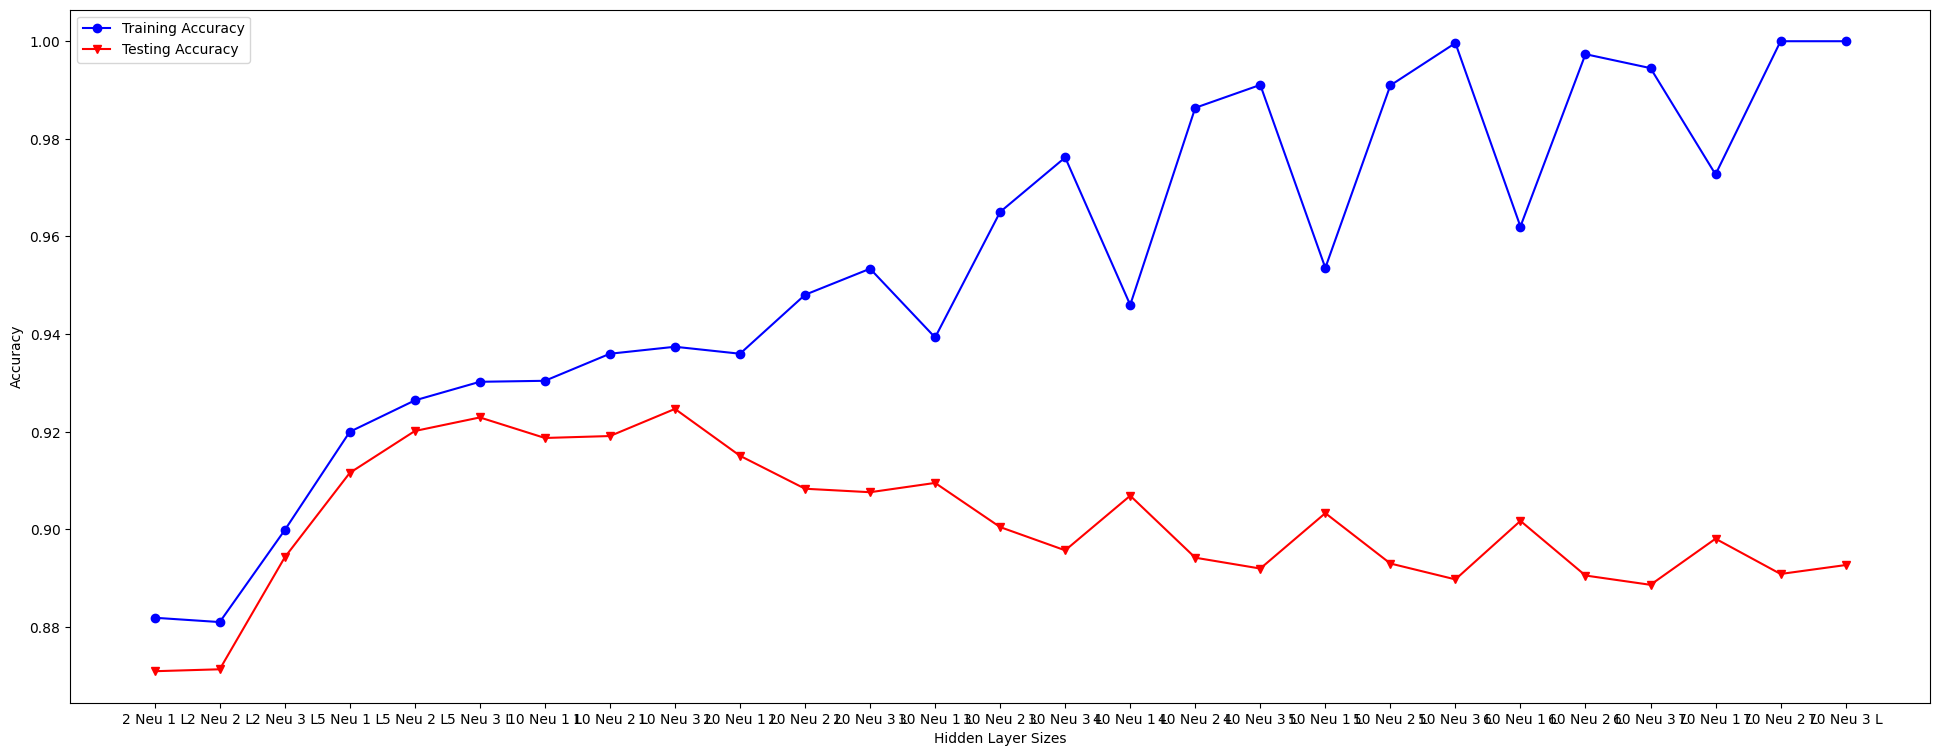

In [4]:
# L refers to number of Layers and Neu refers to number of Neurons
hidden_layer_titles = ["2 Neu 1 L", "2 Neu 2 L", "2 Neu 3 L", "5 Neu 1 L", "5 Neu 2 L", "5 Neu 3 L", "10 Neu 1 L", "10 Neu 2 L", "10 Neu 3 L", "20 Neu 1 L", "20 Neu 2 L", "20 Neu 3 L", "30 Neu 1 L", "30 Neu 2 L", "30 Neu 3 L", "40 Neu 1 L", "40 Neu 2 L", "40 Neu 3 L", "50 Neu 1 L", "50 Neu 2 L", "50 Neu 3 L", "60 Neu 1 L", "60 Neu 2 L", "60 Neu 3 L", "70 Neu 1 L", "70 Neu 2 L", "70 Neu 3 L"]

plt.figure(figsize = (24, 9))
plt.plot(hidden_layer_titles, training_accuracy, color = 'blue', marker = 'o')
plt.plot(hidden_layer_titles, testing_accuracy, color = 'red', marker = 'v')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Hidden Layer Sizes')
plt.show()

#### Creating and Saving Optimal Model for Dataset 1 MLP Classifier

The optimal parameters for the MLP Classifier model for Dataset 1 are used and saved as a pickle file known as `mlp_70_30_dataset_1.pkl`.

In [5]:
# Create a SVM Classifier with the kernel of linear for linear hyperplane
clf = MLPClassifier(hidden_layer_sizes = (5, 5, 5), activation = 'relu', learning_rate = 'constant', solver = 'adam', max_iter = 1000, random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/mlp_70_30_dataset_1.pkl', clf, complete_path=False)

#### Classifier Metrics for Training Dataset (Dataset 1)

In [6]:
# SVM (Linear) Model Performance for the Training Dataset for Dataset 1
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.9302380952380952
Precision: 0.9316079187697508
Recall: 0.9300850797911819
F1 Score: 0.9301637893516066
Mean Squared Error (MSE): 0.27904761904761904
Matthews Correlation Coefficient (MCC): 0.8616916529306624
Cohen's Kappa: 0.8604297419800303
Hamming Loss: 0.06976190476190476

Confusion Matrix:
 [[14154   628]
 [ 1423 13195]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.91      0.96      0.93     14782
         1.0       0.95      0.90      0.93     14618

    accuracy                           0.93     29400
   macro avg       0.93      0.93      0.93     29400
weighted avg       0.93      0.93      0.93     29400





#### Classifier Metrics for Testing Dataset (Dataset 1)

In [7]:
# SVM (Testing) Model Performance for the Testing Dataset for Dataset 1
results = classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.9229365079365079
Precision: 0.9244016736401675
Recall: 0.9233439547682505
F1 Score: 0.9229078343708224
Mean Squared Error (MSE): 0.3082539682539683
Matthews Correlation Coefficient (MCC): 0.8477449685585702
Cohen's Kappa: 0.845976435575508
Hamming Loss: 0.07706349206349207

Confusion Matrix:
 [[5936  282]
 [ 689 5693]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.90      0.95      0.92      6218
         1.0       0.95      0.89      0.92      6382

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600





#### Confusion Matrix for Training Dataset (Dataset 1)

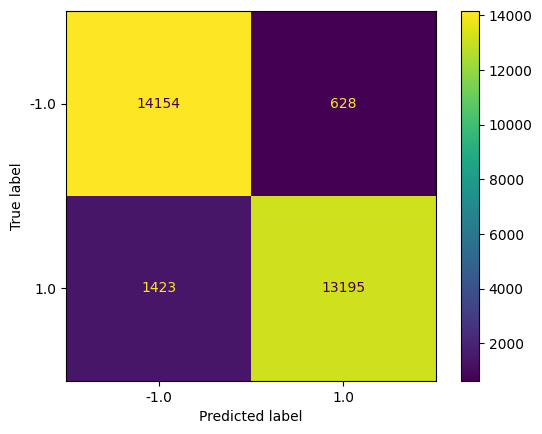

In [8]:
predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Confusion Matrix for Testing Dataset (Dataset 1)

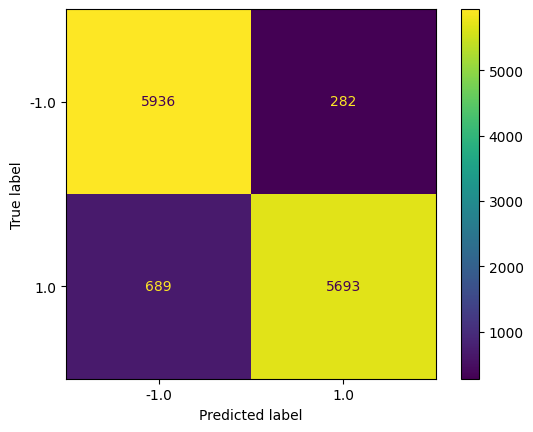

In [9]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

## Dataset_2 (noncir_ss_scaled_trimmed_cir_ss_scaled)

Evaluation of the performance of `dataset_2`. With a 70:30 training and test split

In [10]:
# Select the features to be used for Support Vector Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

### Hyperparameter Tuning for MLPClassifier

The hyperparameter tuning helps to test all the various combinations that we have defined within the parameter space and provides the parameters that provides the most optimal results.

To determine the most optimal parameters for the MLP Classifier, we will conduct Hyperparameter tuning of the `hidden_layer_sizes` parameter.

The following are the parameters that we will define within our MLP Classifier:
- `hidden_layer_sizes`
    - Determines the number of neurons in the ith hidden layer (E.g. (10, 10) Represents 10 neurons in 2 hidden layers)
- `activation`
    - Activation function for the hidden layer
        - `tanh` Hyperbolic tan function, returns f(x) = tanh(x)
        - `relu` Rectified linear unit function, returns f(x) = max(0, x)
- `solver`
    - Solver for weight optimization
        - `adam` Stochastic gradient-based optimiser proposed by Kingma, Diederik, and Jimmy Ba
        - `sgd` Stochastic gradient descent
- `alpha`
    - Strength of the L2 regularization term aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.
- `learning_rate`
    - Learning rate schedule for weight updates
        - `constant` Constant learning rate given by default which is 0.001
        - `adaptive` Keeps the learning rate constant to default 0.001 if the training loss keeps decreasing but for every 2 consecutive epochs fail to decrease the training loss, the current learning rate is divided by 5

In [11]:
HIDDEN_LAYER_SIZES = [[2], [2, 2], [2, 2, 2], [5], [5, 5], [5, 5, 5], [10], [10, 10], [10, 10, 10], [20], [20, 20], [20, 20, 20], [30], [30, 30], [30, 30, 30], [40], [40, 40], [40, 40, 40], [50], [50, 50], [50, 50, 50], [60], [60, 60], [60, 60, 60], [70], [70, 70], [70, 70, 70]]

training_accuracy = []
testing_accuracy = []

for hidden_layer_size in HIDDEN_LAYER_SIZES:
    clf = MLPClassifier(hidden_layer_sizes = hidden_layer_size, activation = 'relu', learning_rate = 'constant', solver = 'adam', max_iter = 1000, random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_train_pred))
    testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("Hidden Layer Size: ", hidden_layer_size)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

Hidden Layer Size:  [2]
Training Accuracy:  0.9029591836734694
Testing Accuracy:  0.8536507936507937
Hidden Layer Size:  [2, 2]
Training Accuracy:  0.9387414965986395
Testing Accuracy:  0.8730952380952381
Hidden Layer Size:  [2, 2, 2]
Training Accuracy:  0.9331292517006803
Testing Accuracy:  0.8694444444444445
Hidden Layer Size:  [5]
Training Accuracy:  0.9752380952380952
Testing Accuracy:  0.8147619047619048
Hidden Layer Size:  [5, 5]
Training Accuracy:  0.9851020408163266
Testing Accuracy:  0.8447619047619047
Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.9801020408163266
Testing Accuracy:  0.8430952380952381
Hidden Layer Size:  [10]
Training Accuracy:  0.9999319727891156
Testing Accuracy:  0.8526190476190476
Hidden Layer Size:  [10, 10]
Training Accuracy:  0.9993537414965986
Testing Accuracy:  0.854047619047619
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.9987074829931972
Testing Accuracy:  0.8461904761904762
Hidden Layer Size:  [20]
Training Accuracy:  1.0
Testing Ac

### Training vs Testing Accuracy Graph

Based on the hidden layer sizes, the most optimal hidden layer size is 2 Neurons and 2 Hidden Layers. As seen in the graph where there is a knee point in the training accuracy and testing accuracy from 2 Neurons and 1 Layer to 2 Neurons and 2 Layers. After that point, the testing accuracy hits a global minima, while the training accuracy has another knee point, which suggests an overfitting of the data at 5 Neurons and 1 Layer. As such, we have selected 2 Neurons and 2 Layers as our optimal parameter for the MLP Classifier.

By selecting an optimal hidden layer size, we are able to prevent overfitting from a high hidden layer size and underfitting from a low hidden layer size.

The optimal parameter for the MLP Classifier with Dataset 1 is:
- `hidden_layer_size`: `(2, 2)`

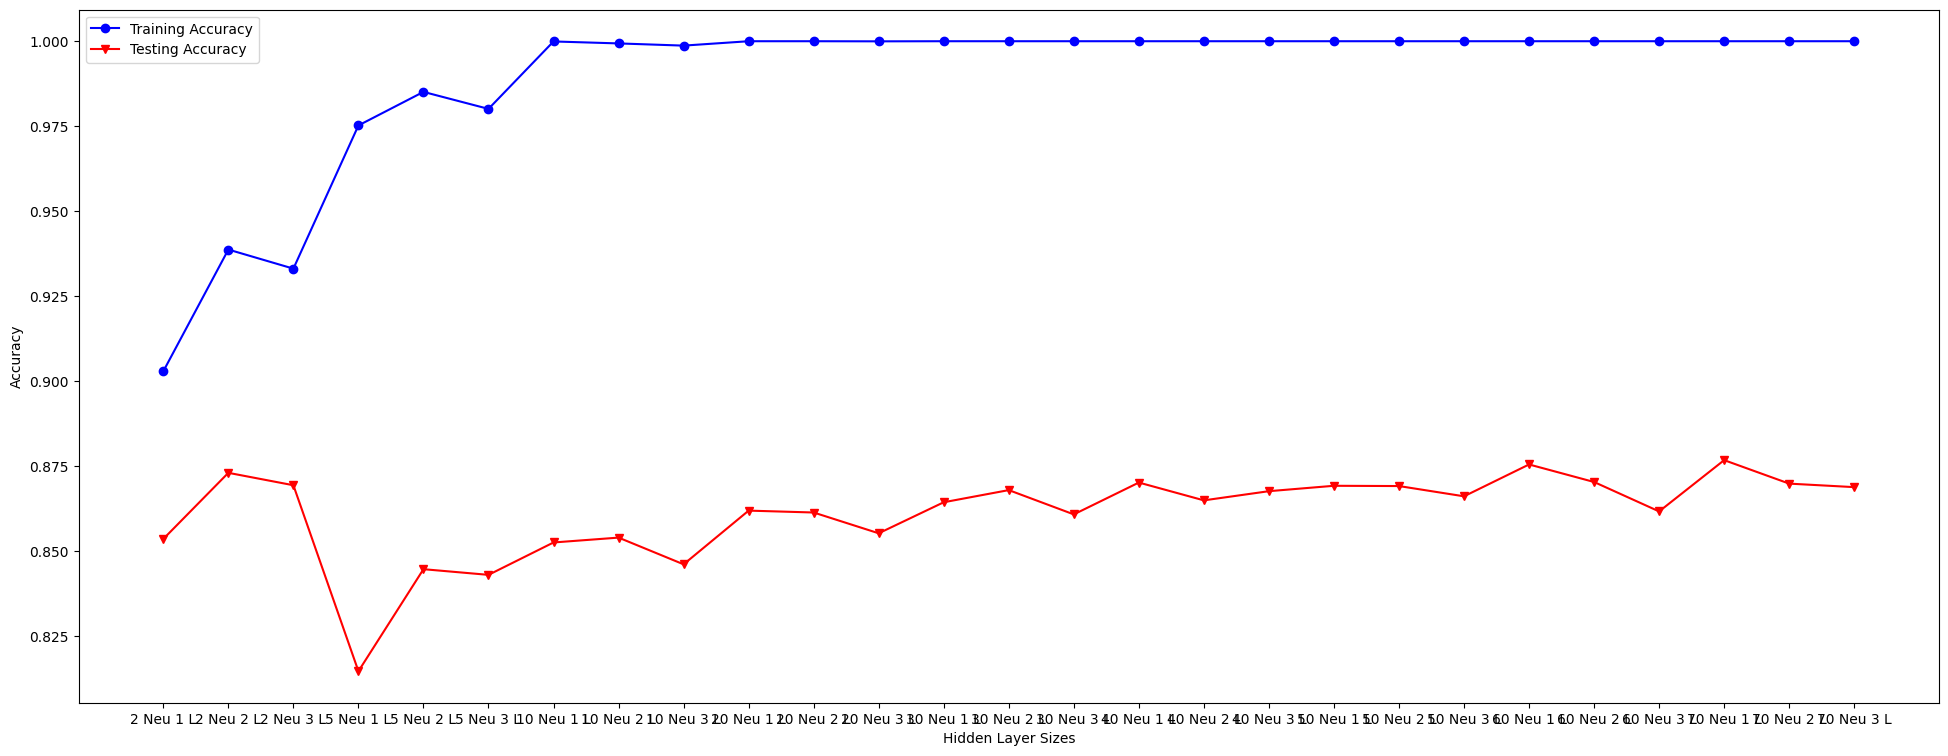

In [12]:
# L refers to number of Layers and Neu refers to number of Neurons
hidden_layer_titles = ["2 Neu 1 L", "2 Neu 2 L", "2 Neu 3 L", "5 Neu 1 L", "5 Neu 2 L", "5 Neu 3 L", "10 Neu 1 L", "10 Neu 2 L", "10 Neu 3 L", "20 Neu 1 L", "20 Neu 2 L", "20 Neu 3 L", "30 Neu 1 L", "30 Neu 2 L", "30 Neu 3 L", "40 Neu 1 L", "40 Neu 2 L", "40 Neu 3 L", "50 Neu 1 L", "50 Neu 2 L", "50 Neu 3 L", "60 Neu 1 L", "60 Neu 2 L", "60 Neu 3 L", "70 Neu 1 L", "70 Neu 2 L", "70 Neu 3 L"]

plt.figure(figsize = (24, 9))
plt.plot(hidden_layer_titles, training_accuracy, color = 'blue', marker = 'o')
plt.plot(hidden_layer_titles, testing_accuracy, color = 'red', marker = 'v')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Hidden Layer Sizes')
plt.show()

#### Creating and Saving Optimal Model for Dataset 2 MLP Classifier

The optimal parameters for the MLP Classifier model for Dataset 2 are used and saved as a pickle file known as `mlp_70_30_dataset_2.pkl`.

In [13]:
# Create a SVM Classifier with the kernel of linear for linear hyperplane
clf = MLPClassifier(hidden_layer_sizes = (2, 2), activation = 'relu', learning_rate = 'constant', solver = 'adam', max_iter = 1000, random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/mlp_70_30_dataset_2.pkl', clf, complete_path=False)

#### Classifier Metrics for Training Dataset (Dataset 2)

In [14]:
# SVM (Linear) Model Performance for the Training Dataset for Dataset 1
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.9387414965986395
Precision: 0.9387583038229588
Recall: 0.938726877687656
F1 Score: 0.9387377145902034
Mean Squared Error (MSE): 0.24503401360544216
Matthews Correlation Coefficient (MCC): 0.8774851809478692
Cohen's Kappa: 0.8774760655401396
Hamming Loss: 0.06125850340136054

Confusion Matrix:
 [[13915   867]
 [  934 13684]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.94      0.94      0.94     14782
         1.0       0.94      0.94      0.94     14618

    accuracy                           0.94     29400
   macro avg       0.94      0.94      0.94     29400
weighted avg       0.94      0.94      0.94     29400





#### Classifier Metrics for Testing Dataset (Dataset 2)

In [15]:
# SVM (Testing) Model Performance for the Testing Dataset for Dataset 1
results = classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.8730952380952381
Precision: 0.8730698849249802
Recall: 0.8731202282795403
F1 Score: 0.8730839174940516
Mean Squared Error (MSE): 0.5076190476190476
Matthews Correlation Coefficient (MCC): 0.7461901115062579
Cohen's Kappa: 0.7461710728907823
Hamming Loss: 0.1269047619047619

Confusion Matrix:
 [[5441  777]
 [ 822 5560]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.87      0.88      0.87      6218
         1.0       0.88      0.87      0.87      6382

    accuracy                           0.87     12600
   macro avg       0.87      0.87      0.87     12600
weighted avg       0.87      0.87      0.87     12600





#### Confusion Matrix for Training Dataset (Dataset 2)

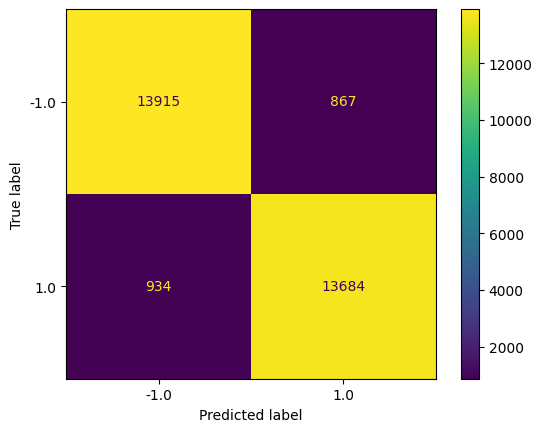

In [16]:
predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Confusion Matrix for Testing Dataset (Dataset 2)

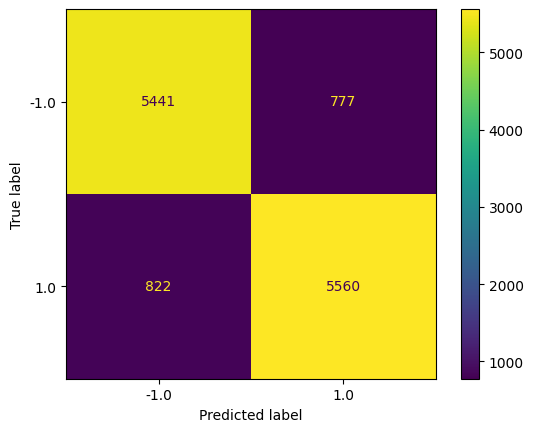

In [17]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

### Dataset_3 (noncir_ss_scaled_trimmed_cir_pca)

Evaluation of the performance of `dataset_3`. With a 70:30 training and test split

In [18]:
# Select the features to be used for Support Vector Classification
X = dataset_3.drop(columns = 'NLOS')
Y = dataset_3[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

### Hyperparameter Tuning for MLPClassifier

The hyperparameter tuning helps to test all the various combinations that we have defined within the parameter space and provides the parameters that provides the most optimal results.

To determine the most optimal parameters for the MLP Classifier, we will conduct Hyperparameter tuning of the `hidden_layer_sizes` parameter.

The following are the parameters that we will define within our MLP Classifier:
- `hidden_layer_sizes`
    - Determines the number of neurons in the ith hidden layer (E.g. (10, 10) Represents 10 neurons in 2 hidden layers)
- `activation`
    - Activation function for the hidden layer
        - `tanh` Hyperbolic tan function, returns f(x) = tanh(x)
        - `relu` Rectified linear unit function, returns f(x) = max(0, x)
- `solver`
    - Solver for weight optimization
        - `adam` Stochastic gradient-based optimiser proposed by Kingma, Diederik, and Jimmy Ba
        - `sgd` Stochastic gradient descent
- `alpha`
    - Strength of the L2 regularization term aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.
- `learning_rate`
    - Learning rate schedule for weight updates
        - `constant` Constant learning rate given by default which is 0.001
        - `adaptive` Keeps the learning rate constant to default 0.001 if the training loss keeps decreasing but for every 2 consecutive epochs fail to decrease the training loss, the current learning rate is divided by 5

In [19]:
HIDDEN_LAYER_SIZES = [[2], [2, 2], [2, 2, 2], [5], [5, 5], [5, 5, 5], [10], [10, 10], [10, 10, 10], [20], [20, 20], [20, 20, 20], [30], [30, 30], [30, 30, 30], [40], [40, 40], [40, 40, 40], [50], [50, 50], [50, 50, 50], [60], [60, 60], [60, 60, 60], [70], [70, 70], [70, 70, 70]]

training_accuracy = []
testing_accuracy = []

for hidden_layer_size in HIDDEN_LAYER_SIZES:
    clf = MLPClassifier(hidden_layer_sizes = hidden_layer_size, activation = 'relu', learning_rate = 'constant', solver = 'adam', max_iter = 1000, random_state = RANDOM_STATE)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_train_pred))
    testing_accuracy.append(accuracy_score(y_test, y_test_pred))
    print("Hidden Layer Size: ", hidden_layer_size)
    print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy: ", accuracy_score(y_test, y_test_pred))

Hidden Layer Size:  [2]
Training Accuracy:  0.8164625850340136
Testing Accuracy:  0.8034126984126985
Hidden Layer Size:  [2, 2]
Training Accuracy:  0.5860204081632653
Testing Accuracy:  0.5869047619047619
Hidden Layer Size:  [2, 2, 2]
Training Accuracy:  0.5591156462585034
Testing Accuracy:  0.5666666666666667
Hidden Layer Size:  [5]
Training Accuracy:  0.6927551020408164
Testing Accuracy:  0.6884126984126984
Hidden Layer Size:  [5, 5]
Training Accuracy:  0.6566326530612245
Testing Accuracy:  0.653015873015873
Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.7643877551020408
Testing Accuracy:  0.7432539682539683
Hidden Layer Size:  [10]
Training Accuracy:  0.8132312925170068
Testing Accuracy:  0.7984920634920635
Hidden Layer Size:  [10, 10]
Training Accuracy:  0.8215646258503402
Testing Accuracy:  0.8076984126984127
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.8579591836734693
Testing Accuracy:  0.8509523809523809
Hidden Layer Size:  [20]
Training Accuracy:  0.763673469387

### Training vs Testing Accuracy Graph

Based on the hidden layer sizes, the most optimal hidden layer size is 10 Neurons and 3 Hidden Layers. As seen in the graph where the initial downwards spike in both training and testing accuracy might have been attributed to an underfit due to the small hidden layer size of the MLP classifier. Afterwhich, it showed an knee point upwards trend until 10 Neurons and 3 Hidden Layers, where it showed another downwards spike before stabilizing once again after another knee point at 20 Neurons and 3 Hidden Layers. As such, we have selected 10 Neurons and 3 Hidden Layers as our most optimal parameter for the MLP Classifier.

By selecting an optimal hidden layer size, we are able to prevent overfitting from a high hidden layer size and underfitting from a low hidden layer size.

The optimal parameter for the MLP Classifier with Dataset 1 is:
- `hidden_layer_size`: `(10, 10, 10)`

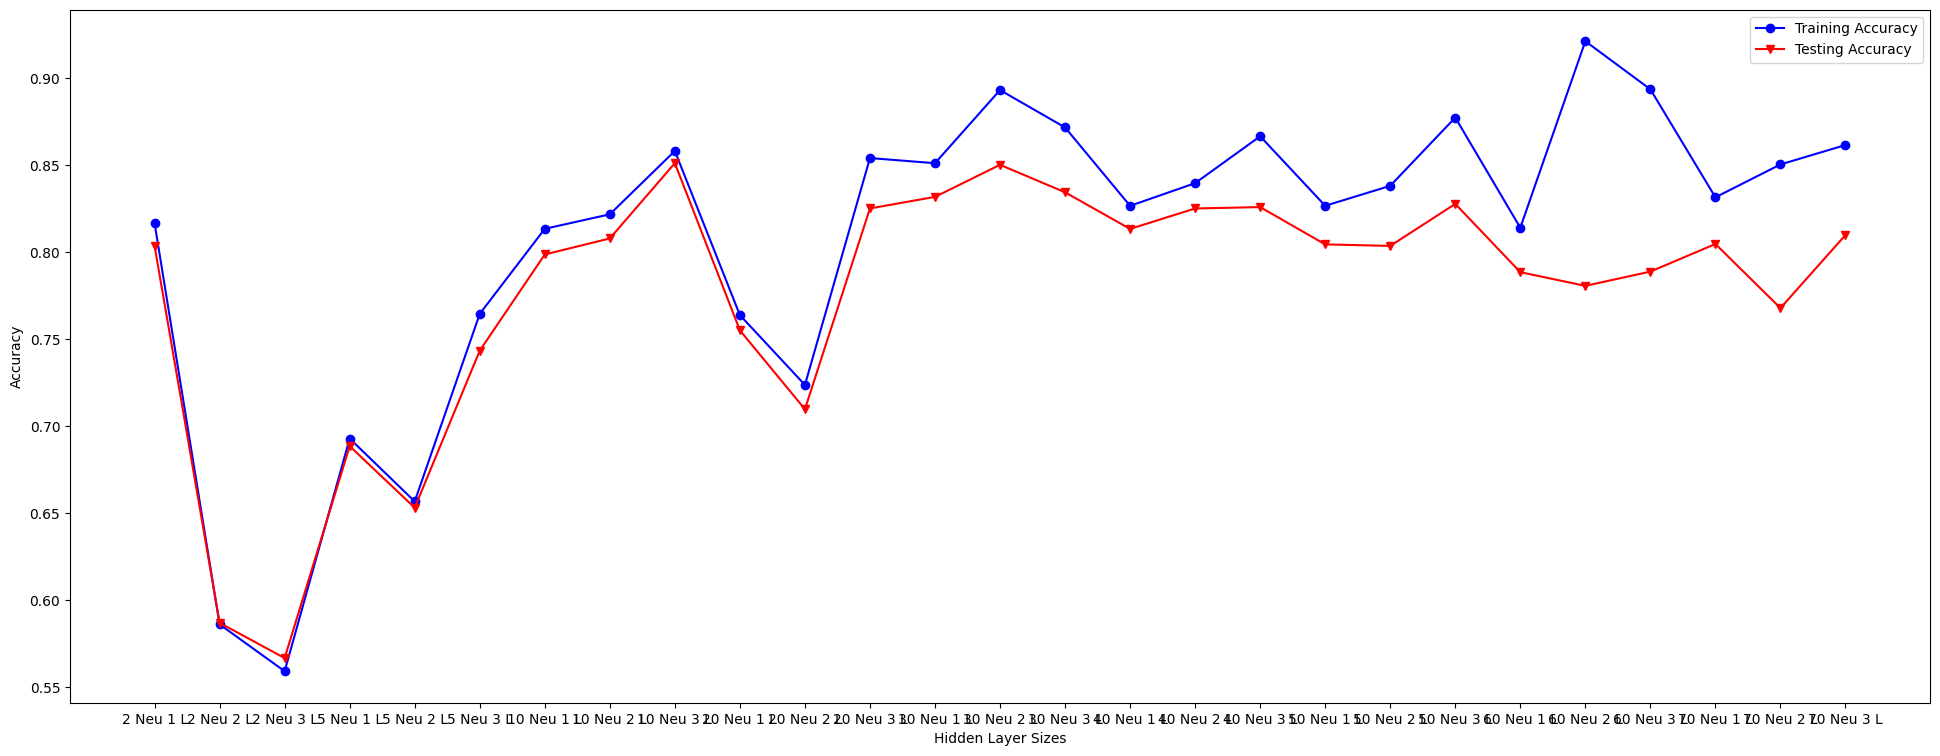

In [20]:
# L refers to number of Layers and Neu refers to number of Neurons
hidden_layer_titles = ["2 Neu 1 L", "2 Neu 2 L", "2 Neu 3 L", "5 Neu 1 L", "5 Neu 2 L", "5 Neu 3 L", "10 Neu 1 L", "10 Neu 2 L", "10 Neu 3 L", "20 Neu 1 L", "20 Neu 2 L", "20 Neu 3 L", "30 Neu 1 L", "30 Neu 2 L", "30 Neu 3 L", "40 Neu 1 L", "40 Neu 2 L", "40 Neu 3 L", "50 Neu 1 L", "50 Neu 2 L", "50 Neu 3 L", "60 Neu 1 L", "60 Neu 2 L", "60 Neu 3 L", "70 Neu 1 L", "70 Neu 2 L", "70 Neu 3 L"]

plt.figure(figsize = (24, 9))
plt.plot(hidden_layer_titles, training_accuracy, color = 'blue', marker = 'o')
plt.plot(hidden_layer_titles, testing_accuracy, color = 'red', marker = 'v')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Hidden Layer Sizes')
plt.show()

#### Creating and Saving Optimal Model for Dataset 3 MLP Classifier

The optimal parameters for the MLP Classifier model for Dataset 3 are used and saved as a pickle file known as `mlp_70_30_dataset_3.pkl`.

In [21]:
# Create a SVM Classifier with the kernel of linear for linear hyperplane
clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10), activation = 'relu', learning_rate = 'constant', solver = 'adam', max_iter = 1000, random_state = RANDOM_STATE)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/mlp_70_30_dataset_3.pkl', clf, complete_path=False)

#### Classifier Metrics for Training Dataset (Dataset 3)

In [22]:
# SVM (Linear) Model Performance for the Training Dataset for Dataset 1
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.8579591836734693
Precision: 0.8634865383683665
Recall: 0.8576155056071993
F1 Score: 0.8573302616099001
Mean Squared Error (MSE): 0.5681632653061225
Matthews Correlation Coefficient (MCC): 0.7210781433381935
Cohen's Kappa: 0.7157166365359175
Hamming Loss: 0.14204081632653062

Confusion Matrix:
 [[13588  1194]
 [ 2982 11636]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.82      0.92      0.87     14782
         1.0       0.91      0.80      0.85     14618

    accuracy                           0.86     29400
   macro avg       0.86      0.86      0.86     29400
weighted avg       0.86      0.86      0.86     29400





#### Classifier Metrics for Testing Dataset (Dataset 3)

In [23]:
# SVM (Testing) Model Performance for the Testing Dataset for Dataset 1
results = classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.8509523809523809
Precision: 0.8572340948169983
Recall: 0.8518177279516943
F1 Score: 0.8504935743979654
Mean Squared Error (MSE): 0.5961904761904762
Matthews Correlation Coefficient (MCC): 0.7090311349592384
Cohen's Kappa: 0.7023843662367221
Hamming Loss: 0.14904761904761904

Confusion Matrix:
 [[5710  508]
 [1370 5012]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.81      0.92      0.86      6218
         1.0       0.91      0.79      0.84      6382

    accuracy                           0.85     12600
   macro avg       0.86      0.85      0.85     12600
weighted avg       0.86      0.85      0.85     12600





#### Confusion Matrix for Training Dataset (Dataset 3)

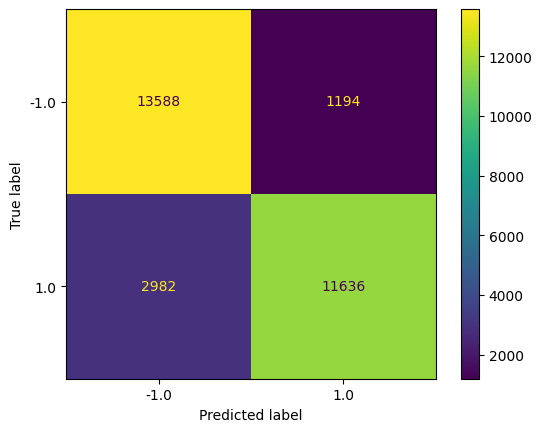

In [24]:
predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

#### Confusion Matrix for Testing Dataset (Dataset 3)

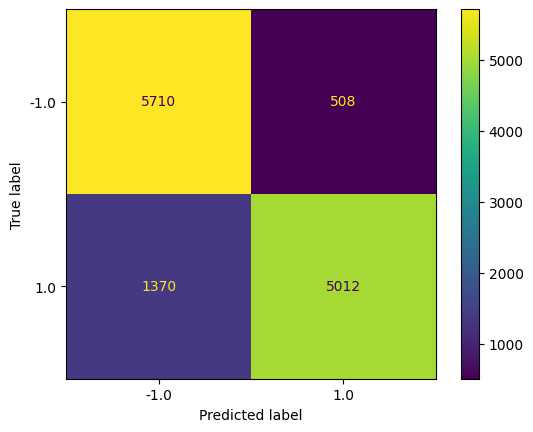

In [25]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()